### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.coef_

array([-1.14644795e-01,  3.62004052e-02,  6.53873262e-03,  2.19924733e+00,
       -1.59109961e+01,  4.26798929e+00, -1.01602089e-02, -1.34698690e+00,
        2.71154731e-01, -1.16326045e-02, -1.01714981e+00,  9.81293722e-03,
       -4.43797298e-01])

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [9]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return sum((y_real - y_pred)**2)/len(y_real)

print("MSE from sklearn: ", mean_squared_error(y_test, y_pred))
print("My MSE: ", MSE(y_test, y_pred))

MSE from sklearn:  41.72457625585785
My MSE:  41.72457625585785


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [10]:
naive_y = sum(y_train)/y_train.shape[0]
print("Naive MSE: ", MSE(y_test, np.ones(y_test.shape[0])*naive_y))

Naive MSE:  87.46623274161735


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [12]:
from sklearn.linear_model import Ridge

lambdas = np.arange(0, 3.0, 0.2)

# Лямбды и их ошибки на тестовой выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    model = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Сохраняем ошибку на тестовой выборке
    lambda_errors.append((val, MSE(y_test, y_pred)))
    print((val, MSE(y_test, y_pred)))      

min_val, min_test_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
best_reg = Ridge(alpha=min_val)

best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)
error = MSE(y_test, y_pred)

print("\nОптимальная lambda: ")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, error))

(0.0, 41.72457625585793)
(0.2, 41.99392625803544)
(0.4, 42.23028032457187)
(0.6000000000000001, 42.43459666789694)
(0.8, 42.61079992735451)
(1.0, 42.763144601802516)
(1.2000000000000002, 42.895448767844016)
(1.4000000000000001, 43.01093348159109)
(1.6, 43.112254585560294)
(1.8, 43.201586096237065)
(2.0, 43.2807075015259)
(2.2, 43.35108033793666)
(2.4000000000000004, 43.413911149402956)
(2.6, 43.470201854581155)
(2.8000000000000003, 43.520789597023615)

Оптимальная lambda: 
Lambda=0.00, результат=41.72


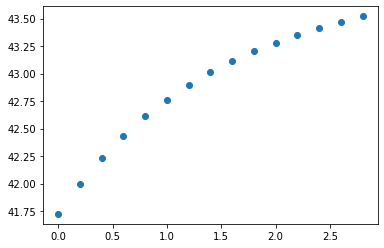

In [13]:
# Ошибка минимальна при lambda = 0.00
plt.scatter(lambdas, np.array(lambda_errors)[::, 1])
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация не помогла улучшить результат... Оптимальная lambda 0.0, результат=41.72. Регуляризация нужна для того, чтобы уменьшить веса, но у нашей модели и так небольшие веса... Видимо в этом проблема

In [14]:
from sklearn.linear_model import Lasso

lambdas = np.arange(0.1, 3.0, 0.2)

# Лямбды и их ошибки на тестовой выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    model = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Сохраняем ошибку на тестовой выборке
    lambda_errors.append((val, MSE(y_test, y_pred)))
    print((val, MSE(y_test, y_pred)))    

min_val, min_test_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
best_reg = Lasso(alpha=min_val)

best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)
error = MSE(y_test, y_pred)

print("\nОптимальная lambda: ")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, error))

(0.1, 45.23817221620139)
(0.30000000000000004, 44.63160376478048)
(0.5000000000000001, 43.884033428529904)
(0.7000000000000001, 43.65859734496311)
(0.9000000000000001, 43.60736307721599)
(1.1000000000000003, 43.8322864703614)
(1.3000000000000003, 44.34935573697127)
(1.5000000000000004, 45.02820767131893)
(1.7000000000000004, 45.64915214418605)
(1.9000000000000004, 46.33483662489416)
(2.1000000000000005, 46.98281841193122)
(2.3000000000000007, 47.222011934703836)
(2.5000000000000004, 47.41139333160755)
(2.7000000000000006, 47.59411226095846)
(2.900000000000001, 47.79732516042525)

Оптимальная lambda: 
Lambda=0.90, результат=43.61


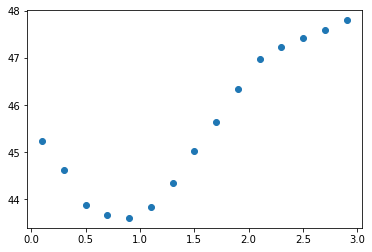

In [15]:
# Ошибка минимальна при lambda = 0.90
plt.scatter(lambdas, np.array(lambda_errors)[::, 1])
plt.show()

L-1 регуляризация также не помогла найти решение лучше. При Lasso с коэффициентом 0.9 результат равен 43.61